# Day 7 - Price optimization

A dataset from kaggle on retail_pricing for use in optimization of pricing - "The data contains the demand and corresponding average unit price at a product - month_year level"

The code and methodology was based on this article on price optimization: https://medium.com/operations-research-bit/a-practical-guide-to-pricing-optimisation-using-machine-learning-5ec4bf7f0d4c


In [69]:
import pandas as pd

In [70]:
df = pd.read_csv("retail_price.xls")

In [71]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [119]:
# Which columns are present
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'predicted_sales', 'scf',
       'adj_psc'],
      dtype='object')

Info about columns

|column|info|
|-----|-----|
|freght_price | average|
unit_price | average
product_score | average product rating
customers | no of customers in the category
holiday | number of holidays in that month
comp_1 | competitor 1 price
ps1 | competitor 1 product rating
fp1 | competitor 1 freight price
...
lag_price |previous month price of the product

In [73]:
# Which products do we have data on?
df["product_id"].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

Let's compare prices with competitor one

In [74]:
import matplotlib.pyplot as plt

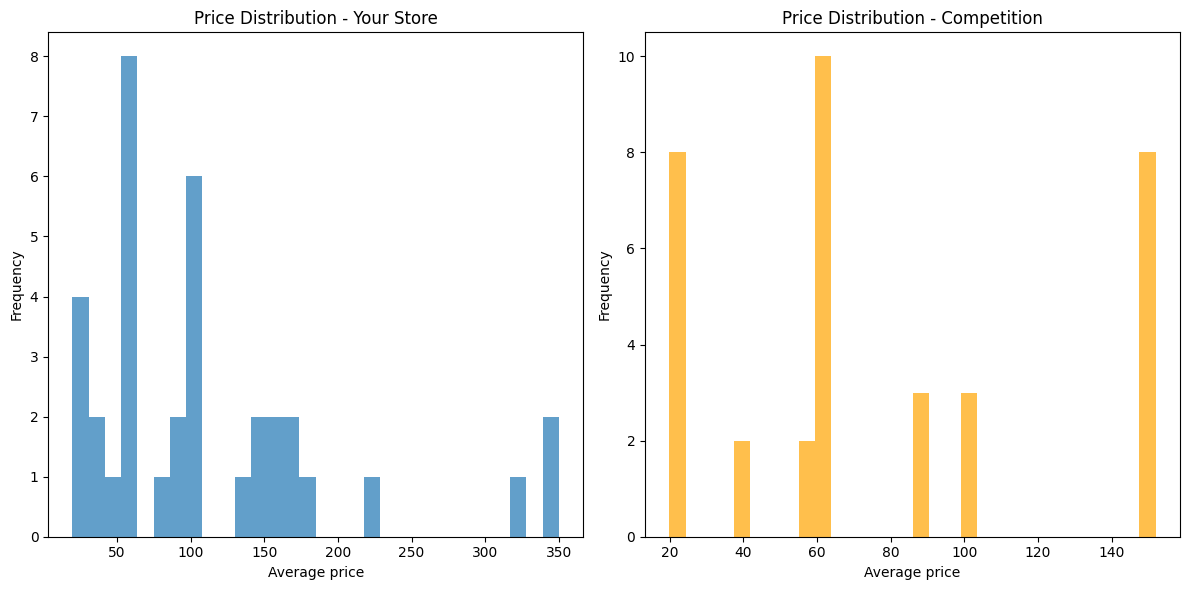

In [75]:
# Let's first filter a specific month

df_sept = df[df["month_year"] == "01-09-2017"]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_sept['unit_price'], bins=30, alpha=0.7, label='Your Store')
plt.xlabel('Average price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(df_sept['comp_1'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Average price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

Here we can see that "our" store has more differences in prices, compared to the competition of store one, as they have less variance in pricing.

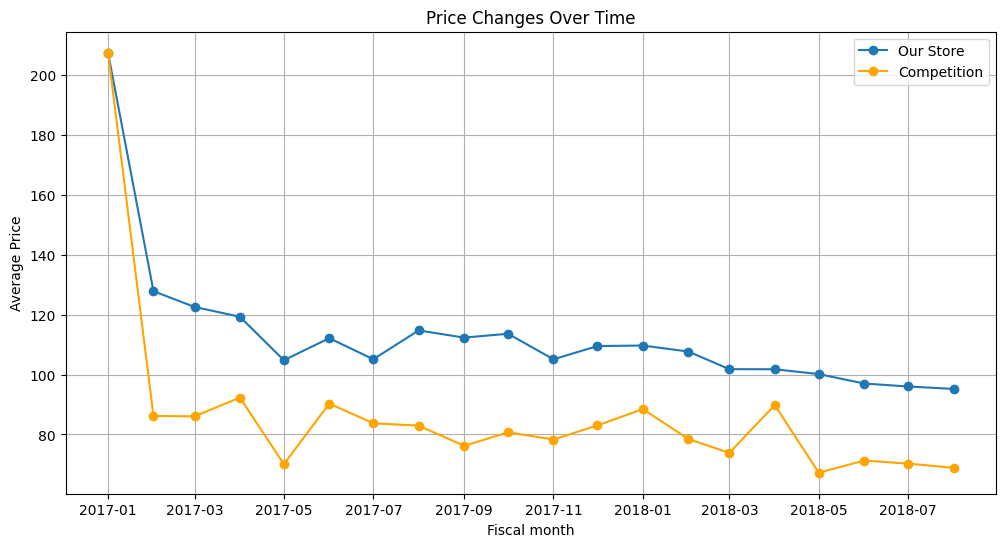

In [77]:
# Let's aggregate prices and compare prices over time for each category

# Make sure date table is treated as datetime
df["month_year"] = pd.to_datetime(df["month_year"], format="%d-%m-%Y")

# Create aggregate pricing per month
monthly_prices = df.groupby(["month_year"]).agg({
    "unit_price": "mean",
    "comp_1": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(monthly_prices["month_year"], monthly_prices["unit_price"], label='Our Store', marker='o')
plt.plot(monthly_prices["month_year"], monthly_prices["comp_1"], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal month')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

Our store and the competitor are thus reducing prices over time

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

features = ["unit_price"]
target = "qty"

# Creating train and test data sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

test_rmse = mean_squared_error(y_test, y_pred)

print(f"Test RMSE: {test_rmse:.2f}")

In [93]:
df["predicted_sales"] = model.predict(scaler.transform(df[features]))

In [94]:
df["predicted_sales"]

0      16.208311
1      16.208311
2      16.208311
3      16.208311
4      16.208311
         ...    
671    12.070426
672    12.217290
673    12.315199
674    12.449584
675    13.333485
Name: predicted_sales, Length: 676, dtype: float64

In [95]:
mean_sales = df["predicted_sales"].mean()

In [96]:
mean_sales

np.float64(14.726289672892316)

In [97]:
std_sales = df["predicted_sales"].std()
scaling_factor = 1 +  (0.1 * (df["predicted_sales"] - mean_sales) / std_sales)
df['scf'] = scaling_factor.astype(float)

In [102]:
# Calculate adjusted price based on the above variables
df['adj_psc'] = df["unit_price"] * df['scf']

In [111]:
relevant_columns = ['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', "adj_psc", 'product_photos_qty', 'product_weight_g',
       'product_score', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', "predicted_sales", "scf"]

In [112]:
df[relevant_columns]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,adj_psc,product_photos_qty,product_weight_g,...,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,predicted_sales,scf
0,bed1,bed_bath_table,2017-05-01,1,45.95,15.100000,45.950000,49.601899,2,350,...,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000,16.208311,1.079476
1,bed1,bed_bath_table,2017-06-01,3,137.85,12.933333,45.950000,49.601899,2,350,...,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000,16.208311,1.079476
2,bed1,bed_bath_table,2017-07-01,6,275.70,14.840000,45.950000,49.601899,2,350,...,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000,16.208311,1.079476
3,bed1,bed_bath_table,2017-08-01,4,183.80,14.287500,45.950000,49.601899,2,350,...,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000,16.208311,1.079476
4,bed1,bed_bath_table,2017-09-01,2,91.90,15.100000,45.950000,49.601899,2,350,...,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000,16.208311,1.079476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,2017-05-01,1,215.00,8.760000,215.000000,184.378737,5,9750,...,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000,12.070426,0.857576
672,bed5,bed_bath_table,2017-06-01,10,2090.00,21.322000,209.000000,180.879321,5,9750,...,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000,12.217290,0.865451
673,bed5,bed_bath_table,2017-07-01,59,12095.00,22.195932,205.000000,178.493872,5,9750,...,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000,12.315199,0.870702
674,bed5,bed_bath_table,2017-08-01,52,10375.00,19.412885,199.509804,175.151334,5,9750,...,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000,12.449584,0.877908


In [118]:
df[df["product_id"] == "bed1"]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,predicted_sales,scf,adj_psc
0,bed1,bed_bath_table,2017-05-01,1,45.95,15.100000,45.950000,39,161,2,...,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000,16.208311,1.079476,49.601899
1,bed1,bed_bath_table,2017-06-01,3,137.85,12.933333,45.950000,39,161,2,...,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000,16.208311,1.079476,49.601899
2,bed1,bed_bath_table,2017-07-01,6,275.70,14.840000,45.950000,39,161,2,...,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000,16.208311,1.079476,49.601899
3,bed1,bed_bath_table,2017-08-01,4,183.80,14.287500,45.950000,39,161,2,...,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000,16.208311,1.079476,49.601899
4,bed1,bed_bath_table,2017-09-01,2,91.90,15.100000,45.950000,39,161,2,...,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000,16.208311,1.079476,49.601899
5,bed1,bed_bath_table,2017-10-01,3,137.85,15.100000,45.950000,39,161,2,...,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000,16.208311,1.079476,49.601899
6,bed1,bed_bath_table,2017-11-01,11,445.85,15.832727,40.531818,39,161,2,...,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000,16.340933,1.086588,44.041370
7,bed1,bed_bath_table,2017-12-01,6,239.94,15.230000,39.990000,39,161,2,...,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818,16.354196,1.087299,43.481078
8,bed1,bed_bath_table,2018-01-01,19,759.81,16.533684,39.990000,39,161,2,...,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000,16.354196,1.087299,43.481078
9,bed1,bed_bath_table,2018-02-01,18,719.82,13.749444,39.990000,39,161,2,...,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000,16.354196,1.087299,43.481078


In this instance, we clearly see a big difference in actual quantity and predicted_sales